# An asteroid.py Tutorial: The AsteroidSpectrum object and classifying asteroids
## Authors
Joman Wong

## Version date
1 August 2023

## Learning Goals
* Storing a spectrum as AsteroidSpectrum
* Read in an asteroid spectrum sourced externally (MITHNEOS)
* Plot an asteroid spectrum (asteroid.plot)
* Classify a spectrum with asteroid.py (classifyAsteroid)
* Compare a spectrum to a set of spectral templates (classifyAsteroid)

## Keywords
spectral archive, spectral analysis, classification, principal component analysis, machine learning(?)

## Related Content
tutorials/basic_spectral_analysis.ipynb

## Summary
In this tutorial, we will source an asteroid spectrum taken at the NASA IRTF and use asteroid.py to provide a taxonomic class. While we will not examine the principal component analysis behind the classification in depth, we will experiment with the built-in functions to load and visualize our data.

## Starting off
After making sure splat is installed correctly (please see related content for more information), import splat and asteroid.

In [1]:
# main splat imports
import splat
from splat import asteroid



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
You are currently using version 2023.07.05

If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/


Created dictionary with 24 classes from DemeoAsteroids
Stored principal components from demeo_ir_eigenvectors_and_channel_means.txt


## Introducing the *AsteroidSpectrum* class

The *AsteroidSpectrum* is an extension of the splat.Spectrum class and inherits many of the functionalities that were already available. The functionalities include .plot() and other spectral math operations from the broader SPLAT package. Besides the similarities, spectra of the *AsteroidSpectrum* type have unitless reflectance "flux" quantities and identifies themselves as asteroid specta. Subsequently, we are able to perform classification of the spectrum with two different methods, and obtain a vizualization of our numeric data.

## Reading in and visualizing spectra

Like the splat.Spectrum class, we are able to turn a .fits file to an *AsteroidSpectrum*. Although currently no asteroid spectra is stored as part of the splat resources, we are able to source our own externally. 

For instance, we can read in a spectrum for the asteroid Hebe from the tutorial folder.

In [2]:
TUTORIAL_SPECTRA_PATH = splat.SPLAT_PATH + '/tutorials/tutorial_asteroids'

In [3]:
# spectrum of the asteroid 6 Hebe 
hebe_asp = asteroid.AsteroidSpectrum(TUTORIAL_SPECTRA_PATH + '/spex-prism_Hebe_20010428.fits', instrument = 'SpeX-prism')
hebe_asp

SpeX-prism asteroid spectrum of spex-prism_Hebe_20010428.fits

### We can also plot the asteroid spectrum we just read like any other spectrum in splat:

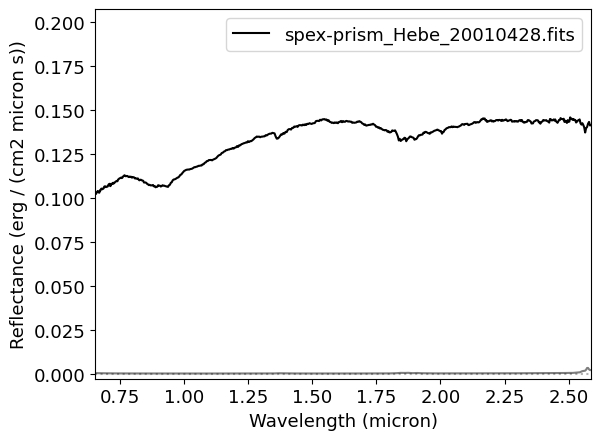

<Figure size 640x480 with 0 Axes>

In [4]:
hebe_asp.plot()

## Obtaining an asteroid spectrum externally
While there are currently no built in asteroid spectra in SPLAT, we can obtain our own.

**Example: Using data from the MIT-Hawaii Near-Earth Object Spectroscopic Survey (MITHNEOS)**

http://smass.mit.edu/minus.html (MITHNEOS)

For instance, I have downloaded the following data, which is a .txt file, and stored it somewhere in my local machine.
http://smass.mit.edu/data/spex/sp116/a099942.sp116.txt (sp116, asteroid 99942)

However, data from the MITHNEOS website is written in a particular format, and unlike .fits, the data does not include a header with the corresponding observational circumstances. But, there is a function in asteroid.py to read in this type of data. 
### MITHNEOS_to_Spectrum
The data format of MITHNEOS is described here: http://smass.mit.edu/minus_format.html, and MITHNEOS_to_Spectrum takes a path argument to construct an *AsteroidSpectrum* object. For convenience of the tutorial, we have included the example spectrum in the tutorial folder as well.

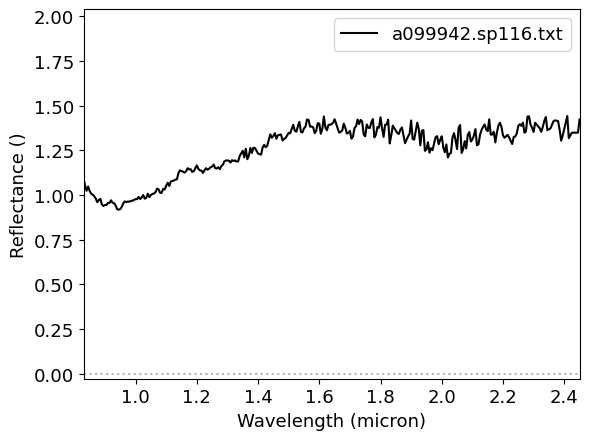

In [5]:
# local_mit_asp = asteroid.MITHNEOS_to_Spectrum('C:/PythonCodes/JupyterWorkspace/splat_projects/MITHNEOS_data/sp116/a099942.sp116.txt')
mit_asp = asteroid.MITHNEOS_to_Spectrum(TUTORIAL_SPECTRA_PATH + '/a099942.sp116.txt')
mit_asp.plot()

## Spectrum manipulation
The built-in features for manipulating a splat.Spectrum object also applies to asteroid.AsteroidSpectrum.

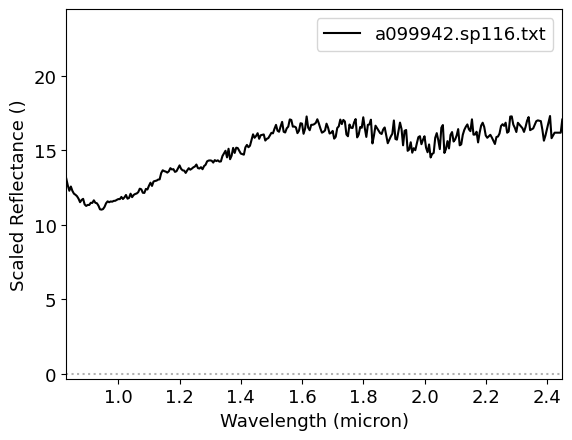

In [6]:
# multiply the spectrum by a scale factor 12x
mit_asp.scale(12)
mit_asp.plot()

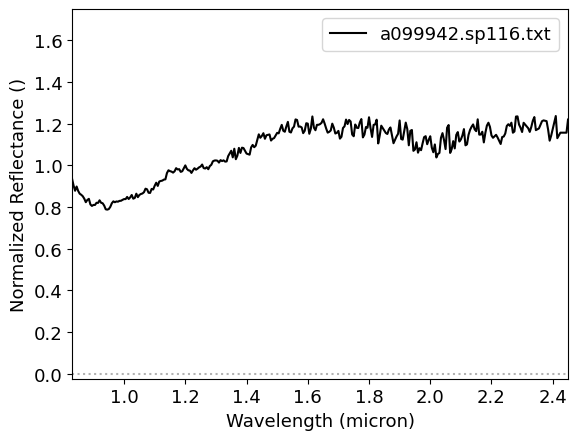

In [7]:
# normalize to unity at 1.20 µm
mit_asp.normalize(1.20)
mit_asp.plot()

## Classifying Asteroid(s) with asteroid.classifyAsteroid()
The main feature of asteroid.py is the ability to classify an *AsteroidSpectrum*.

Using a tutorial spectrum we obtained earlier:

In [8]:
# mit_asp
asteroid.classifyAsteroid(mit_asp)

'S, Sq, Q, L, K'

classifyAsteroid follows the Bus-DeMeo taxonomy and returns a string of the verdict by default. With additional keyword arguments, we can plot, obtain more information, or compare the input spectra with the reconstruction using principal components.

In [9]:
classify_results = asteroid.classifyAsteroid(mit_asp, scores = True)

**Using scores = True returns a dictionary instead, as follows**

In [10]:
classify_results

{'Name': 'a099942.sp116.txt',
 'Taxon': 'S, Sq, Q, L, K',
 'PC Scores': array([-0.06068949, -0.13820317, -0.07205773, -0.08565651, -0.07915681]),
 'Slope': 0.22856317345949603}

**Using plot = True will plot the input spectrum and reconstruction with the PC scores from principal component analysis**

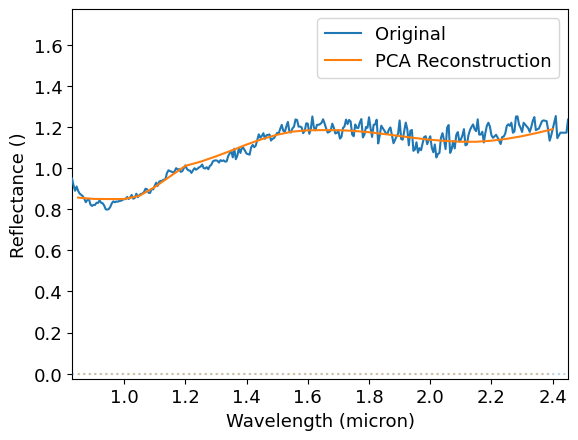

In [11]:
classify_results = asteroid.classifyAsteroid(mit_asp, scores = True, plot = True)

**In addition to returning the result in a dictionary, we also have the function to display our classification**

In [12]:
classify_results = asteroid.classifyAsteroid(mit_asp, scores = True, print_result = True)

a099942.sp116.txt
Slope: 0.22856317345949603
PC Scores: [-0.06068949 -0.13820317 -0.07205773 -0.08565651 -0.07915681]
Verdict: S, Sq, Q, L, K


#### TBD: Besides PCA, we can also use template comparison to obtain a result based on a best match statistic

---

#### Other functionalities could be found using **asteroid.classifyAsteroid?**

In [13]:
# asteroid.classifyAsteroid?

---